In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import glob

In [3]:
#Two data sets are used in this project
#1 - Google mobility data set (https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip)
#2 - COVID data set (https://covid.ourworldindata.org/data/owid-covid-data.csv)

In [4]:
#First dataframe is from - #https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip
#Read all csv files 
path = r'C:\Personal\AIML\Mini_Capstone_Feb_2021\Mobility\Region_Mobility_Report_CSVs__18042021' # use your path
all_files = glob.glob(path + "/*.csv")

In [5]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    #print (filename)
    li.append(df)

In [6]:
google_mob_df = pd.concat(li, axis=0, ignore_index=True)

In [7]:
google_mob_df.shape

(5013220, 15)

In [8]:
google_mob_df.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
metro_area                                             object
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [9]:
#check for null values
google_mob_df.isnull().sum()

country_region_code                                      3193
country_region                                              0
sub_region_1                                            84643
sub_region_2                                           829507
metro_area                                            4985730
iso_3166_2_code                                       4121664
census_fips_code                                      3951611
place_id                                                 9055
date                                                        0
retail_and_recreation_percent_change_from_baseline    1877090
grocery_and_pharmacy_percent_change_from_baseline     1993683
parks_percent_change_from_baseline                    2602459
transit_stations_percent_change_from_baseline         2486904
workplaces_percent_change_from_baseline                216105
residential_percent_change_from_baseline              2067383
dtype: int64

In [10]:
#The dataframe contains, mobility data for country, state (parameter: sub_region_1) and cities (parameter: metro_area)
#Extract only country level mobility data, since the second data set for COVID and associated cases is only for countries
#For this, need to take rows which null values in sub_region_1 and metro_area columns

In [11]:
google_mob_df_sub_1 = google_mob_df[google_mob_df.sub_region_1.isnull()]
google_mob_df_sub_2 = google_mob_df_sub_1[google_mob_df_sub_1.metro_area.isnull()]

In [12]:
#check the size of country level mobility data
google_mob_df_sub_2.shape

(57153, 15)

In [13]:
#check for the null data in this
google_mob_df_sub_2.isnull().sum()

country_region_code                                     425
country_region                                            0
sub_region_1                                          57153
sub_region_2                                          57153
metro_area                                            57153
iso_3166_2_code                                       57153
census_fips_code                                      57153
place_id                                                  0
date                                                      0
retail_and_recreation_percent_change_from_baseline     1013
grocery_and_pharmacy_percent_change_from_baseline      1071
parks_percent_change_from_baseline                     1228
transit_stations_percent_change_from_baseline           890
workplaces_percent_change_from_baseline                 167
residential_percent_change_from_baseline               1371
dtype: int64

In [14]:
#As we can see all entrtries in sub_region_1, sub_region_2 and metro_area columns are null
#These columns will be removed later

In [15]:
google_mob_df_sub_2.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [16]:
#drop unwanted columns as part of data clean up
mob_df = google_mob_df_sub_2.drop(['sub_region_1','sub_region_2','metro_area','iso_3166_2_code','iso_3166_2_code','census_fips_code'],axis=1)

In [17]:
mob_df.head()

,country_region_code,country_region,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [18]:
mob_df.shape

(57153, 10)

In [19]:
#List of countries
mob_df['country_region_code'].unique()

array(['AE', 'AF', 'AG', 'AO', 'AR', 'AT', 'AU', 'AW', 'BA', 'BB', 'BD',
       'BE', 'BF', 'BG', 'BH', 'BJ', 'BO', 'BR', 'BS', 'BW', 'BY', 'BZ',
       'CA', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CZ', 'DE', 'DK',
       'DO', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FR', 'GA', 'GB', 'GE',
       'GH', 'GR', 'GT', 'GW', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IQ', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KR',
       'KW', 'KZ', 'LA', 'LB', 'LI', 'LK', 'LT', 'LU', 'LV', 'LY', 'MA',
       'MD', 'MK', 'ML', 'MM', 'MN', 'MT', 'MU', 'MX', 'MY', 'MZ', nan,
       'NE', 'NG', 'NI', 'NL', 'NO', 'NP', 'NZ', 'OM', 'PA', 'PE', 'PG',
       'PH', 'PK', 'PL', 'PR', 'PT', 'PY', 'QA', 'RE', 'RO', 'RS', 'RU',
       'RW', 'SA', 'SE', 'SG', 'SI', 'SK', 'SN', 'SV', 'TG', 'TH', 'TJ',
       'TR', 'TT', 'TW', 'TZ', 'UA', 'UG', 'US', 'UY', 'VE', 'VN', 'YE',
       'ZA', 'ZM', 'ZW'], dtype=object)

In [20]:
#Number of countries from the mobility data frame
len(mob_df['country_region_code'].unique())

135

In [21]:
mob_df.dtypes

country_region_code                                    object
country_region                                         object
place_id                                               object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [22]:
mob_df.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline,56140.0,-23.303313,24.216882,-100.0,-37.0,-20.0,-7.0,120.0
grocery_and_pharmacy_percent_change_from_baseline,56082.0,-4.627421,23.005162,-100.0,-15.0,-3.0,6.0,166.0
parks_percent_change_from_baseline,55925.0,-3.251140,45.216040,-100.0,-28.0,-11.0,9.0,517.0
transit_stations_percent_change_from_baseline,56263.0,-27.684571,24.418932,-100.0,-44.0,-28.0,-11.0,91.0
workplaces_percent_change_from_baseline,56986.0,-21.627575,19.611860,-99.0,-32.0,-20.0,-8.0,131.0
residential_percent_change_from_baseline,55782.0,8.845434,8.803893,-35.0,2.0,8.0,13.0,55.0


<Figure size 432x288 with 0 Axes>

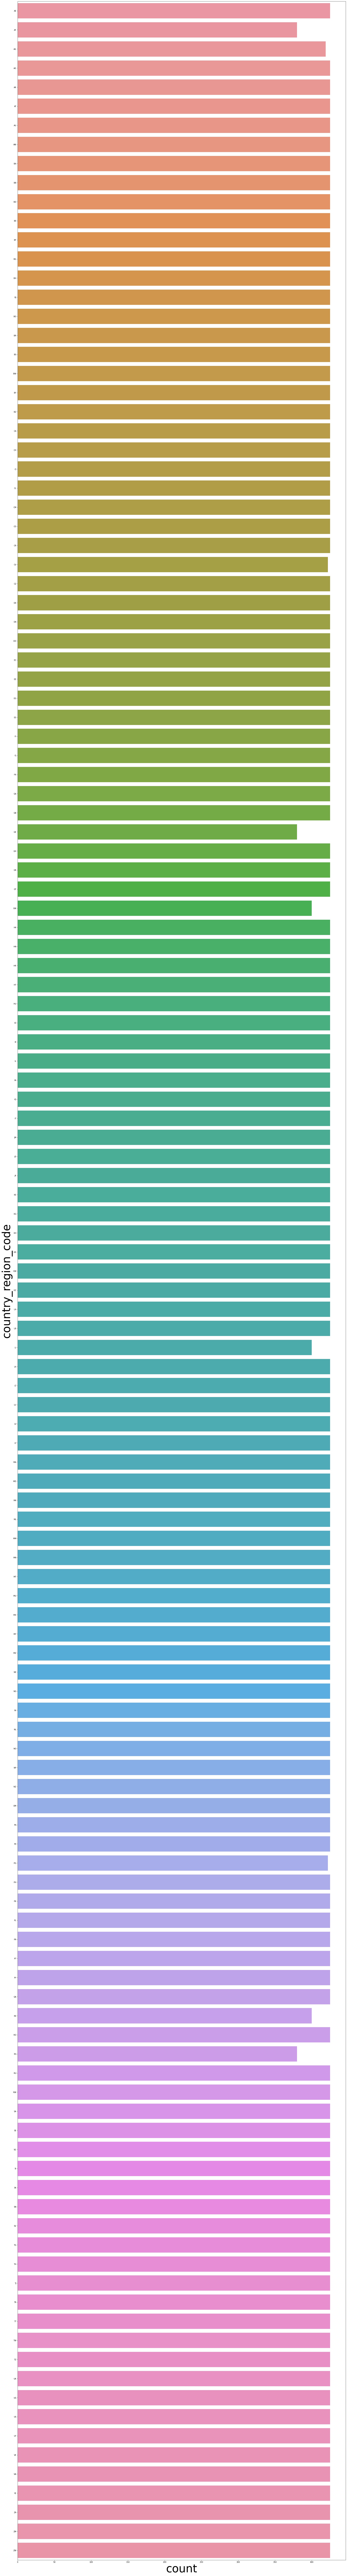

In [23]:
#Count of entries for each country

fig = plt.figure()
plt.figure(figsize=(32, 256))
plt.xlabel('xlabel', fontsize=60)
plt.ylabel('ylabel', fontsize=60)
fig.suptitle('test title', fontsize=20)
sns.countplot(y=mob_df.country_region_code)

In [24]:
#function to convert time series data to supervised learning data
#In each row for the mobility parameters, two previous and two future data is taken

def series_to_supervised(data, col_names,n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    #print("Coulmns: ",list(col_names))
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        #names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        names += [('%s_t_p%d' % (col_name, i)) for col_name in list(col_names)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s_t_0' % (col_name)) for col_name in list(col_names)]
            #names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            #names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            names += [('%s_t_m%d' % (col_name, i)) for col_name in list(col_names)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [25]:
cleaned_mob_data = pd.DataFrame(series_to_supervised(mob_df.values,mob_df.columns,1,1))

In [26]:
#Uncomment below step if no need to use above time series conversion
#cleaned_mob_data = mob_df

In [27]:
cleaned_mob_data.columns

Index(['country_region_code_t_p1', 'country_region_t_p1', 'place_id_t_p1',
       'date_t_p1', 'retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1',
       'country_region_code_t_0', 'country_region_t_0', 'place_id_t_0',
       'date_t_0', 'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0'],
      dtype='object')

In [28]:
cleaned_mob_data.rename(columns = {'date_t_0':'date'}, inplace = True) 
cleaned_mob_data.rename(columns = {'country_region_t_0':'country_region'}, inplace = True) 

In [29]:
cleaned_mob_data = cleaned_mob_data.drop([#'country_region_code_t_p2','country_region_t_p2','date_t_p2','place_id_t_p2',
                    'country_region_code_t_p1','country_region_t_p1','date_t_p1','place_id_t_p1',
                    #'country_region_code_t_m1','country_region_t_m1','date_t_m1','place_id_t_m1',
                    'country_region_code_t_0','place_id_t_0'],axis=1)

In [30]:
cleaned_mob_data.dtypes

retail_and_recreation_percent_change_from_baseline_t_p1    object
grocery_and_pharmacy_percent_change_from_baseline_t_p1     object
parks_percent_change_from_baseline_t_p1                    object
transit_stations_percent_change_from_baseline_t_p1         object
workplaces_percent_change_from_baseline_t_p1               object
residential_percent_change_from_baseline_t_p1              object
country_region                                             object
date                                                       object
retail_and_recreation_percent_change_from_baseline_t_0     object
grocery_and_pharmacy_percent_change_from_baseline_t_0      object
parks_percent_change_from_baseline_t_0                     object
transit_stations_percent_change_from_baseline_t_0          object
workplaces_percent_change_from_baseline_t_0                object
residential_percent_change_from_baseline_t_0               object
dtype: object

In [31]:
columns = list(cleaned_mob_data.columns)

for index, col in enumerate(columns):
    #print (col)
    if (col != 'date' and col != 'country_region' and col != 'country_region_code_t_0'):
        cleaned_mob_data[col] = cleaned_mob_data[col].astype(float)

In [32]:
cleaned_mob_data.dtypes

retail_and_recreation_percent_change_from_baseline_t_p1    float64
grocery_and_pharmacy_percent_change_from_baseline_t_p1     float64
parks_percent_change_from_baseline_t_p1                    float64
transit_stations_percent_change_from_baseline_t_p1         float64
workplaces_percent_change_from_baseline_t_p1               float64
residential_percent_change_from_baseline_t_p1              float64
country_region                                              object
date                                                        object
retail_and_recreation_percent_change_from_baseline_t_0     float64
grocery_and_pharmacy_percent_change_from_baseline_t_0      float64
parks_percent_change_from_baseline_t_0                     float64
transit_stations_percent_change_from_baseline_t_0          float64
workplaces_percent_change_from_baseline_t_0                float64
residential_percent_change_from_baseline_t_0               float64
dtype: object

In [33]:
cleaned_mob_data.shape

(54484, 14)

In [34]:
cleaned_mob_data.head()

,retail_and_recreation_percent_change_from_baseline_t_p1,grocery_and_pharmacy_percent_change_from_baseline_t_p1,parks_percent_change_from_baseline_t_p1,transit_stations_percent_change_from_baseline_t_p1,workplaces_percent_change_from_baseline_t_p1,residential_percent_change_from_baseline_t_p1,country_region,date,retail_and_recreation_percent_change_from_baseline_t_0,grocery_and_pharmacy_percent_change_from_baseline_t_0,parks_percent_change_from_baseline_t_0,transit_stations_percent_change_from_baseline_t_0,workplaces_percent_change_from_baseline_t_0,residential_percent_change_from_baseline_t_0
1,0.0,4.0,5.0,0.0,2.0,1.0,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,1.0,4.0,4.0,1.0,2.0,1.0,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,-1.0,1.0,5.0,1.0,2.0,1.0,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,-2.0,1.0,5.0,0.0,2.0,1.0,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
5,-2.0,0.0,4.0,-1.0,2.0,1.0,United Arab Emirates,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0


In [35]:
cleaned_mob_data.reset_index()

,index,retail_and_recreation_percent_change_from_baseline_t_p1,grocery_and_pharmacy_percent_change_from_baseline_t_p1,parks_percent_change_from_baseline_t_p1,transit_stations_percent_change_from_baseline_t_p1,workplaces_percent_change_from_baseline_t_p1,residential_percent_change_from_baseline_t_p1,country_region,date,retail_and_recreation_percent_change_from_baseline_t_0,grocery_and_pharmacy_percent_change_from_baseline_t_0,parks_percent_change_from_baseline_t_0,transit_stations_percent_change_from_baseline_t_0,workplaces_percent_change_from_baseline_t_0,residential_percent_change_from_baseline_t_0
0,1,0.0,4.0,5.0,0.0,2.0,1.0,United Arab Emirates,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
1,2,1.0,4.0,4.0,1.0,2.0,1.0,United Arab Emirates,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
2,3,-1.0,1.0,5.0,1.0,2.0,1.0,United Arab Emirates,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
3,4,-2.0,1.0,5.0,0.0,2.0,1.0,United Arab Emirates,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
4,5,-2.0,0.0,4.0,-1.0,2.0,1.0,United Arab Emirates,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54479,57148,14.0,36.0,23.0,15.0,8.0,0.0,Zimbabwe,2021-04-10,16.0,41.0,26.0,21.0,17.0,-3.0
54480,57149,16.0,41.0,26.0,21.0,17.0,-3.0,Zimbabwe,2021-04-11,15.0,42.0,32.0,17.0,17.0,0.0
54481,57150,15.0,42.0,32.0,17.0,17.0,0.0,Zimbabwe,2021-04-12,12.0,32.0,27.0,20.0,10.0,1.0
54482,57151,12.0,32.0,27.0,20.0,10.0,1.0,Zimbabwe,2021-04-13,13.0,36.0,21.0,15.0,8.0,1.0


In [36]:
#Read second data set

In [37]:
#Coronavirus Source Data
#Available from https://covid.ourworldindata.org/data/owid-covid-data.csv
ow_covid_df = pd.read_csv('owid-covid-data-18042021.csv',encoding='latin1')

In [38]:
#This step is to match the column name with the mobility data frame
ow_covid_df.rename(columns = {'location':'country_region'}, inplace = True) 

In [39]:
ow_covid_df.columns

Index(['iso_code', 'continent', 'country_region', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_p

In [40]:
ow_covid_df.dtypes

iso_code                                  object
continent                                 object
country_region                            object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

In [41]:
len(ow_covid_df.country_region.unique())

215

In [42]:
ow_covid_df.shape

(82286, 59)

In [43]:
cleaned_mob_data.shape

(54484, 14)

In [44]:
#merge the two data frame based on country_region and date columns
df = cleaned_mob_data.merge(ow_covid_df, on=['country_region','date'], how='left')

In [45]:
df.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1', 'country_region',
       'date', 'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'iso_code', 'continent',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new

In [46]:
df.shape

(54484, 71)

In [47]:
len(df.country_region.unique())

131

In [48]:
df.head()

,retail_and_recreation_percent_change_from_baseline_t_p1,grocery_and_pharmacy_percent_change_from_baseline_t_p1,parks_percent_change_from_baseline_t_p1,transit_stations_percent_change_from_baseline_t_p1,workplaces_percent_change_from_baseline_t_p1,residential_percent_change_from_baseline_t_p1,country_region,date,retail_and_recreation_percent_change_from_baseline_t_0,grocery_and_pharmacy_percent_change_from_baseline_t_0,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0.0,4.0,5.0,0.0,2.0,1.0,United Arab Emirates,2020-02-16,1.0,4.0,...,67293.483,NaN,317.84,17.26,1.2,37.4,NaN,1.2,77.97,0.89
1,1.0,4.0,4.0,1.0,2.0,1.0,United Arab Emirates,2020-02-17,-1.0,1.0,...,67293.483,NaN,317.84,17.26,1.2,37.4,NaN,1.2,77.97,0.89
2,-1.0,1.0,5.0,1.0,2.0,1.0,United Arab Emirates,2020-02-18,-2.0,1.0,...,67293.483,NaN,317.84,17.26,1.2,37.4,NaN,1.2,77.97,0.89
3,-2.0,1.0,5.0,0.0,2.0,1.0,United Arab Emirates,2020-02-19,-2.0,0.0,...,67293.483,NaN,317.84,17.26,1.2,37.4,NaN,1.2,77.97,0.89
4,-2.0,0.0,4.0,-1.0,2.0,1.0,United Arab Emirates,2020-02-20,-2.0,1.0,...,67293.483,NaN,317.84,17.26,1.2,37.4,NaN,1.2,77.97,0.89


In [49]:
df.dtypes

retail_and_recreation_percent_change_from_baseline_t_p1    float64
grocery_and_pharmacy_percent_change_from_baseline_t_p1     float64
parks_percent_change_from_baseline_t_p1                    float64
transit_stations_percent_change_from_baseline_t_p1         float64
workplaces_percent_change_from_baseline_t_p1               float64
                                                            ...   
male_smokers                                               float64
handwashing_facilities                                     float64
hospital_beds_per_thousand                                 float64
life_expectancy                                            float64
human_development_index                                    float64
Length: 71, dtype: object

In [50]:
#df.describe().T

In [51]:
df.isnull().sum()

retail_and_recreation_percent_change_from_baseline_t_p1        0
grocery_and_pharmacy_percent_change_from_baseline_t_p1         0
parks_percent_change_from_baseline_t_p1                        0
transit_stations_percent_change_from_baseline_t_p1             0
workplaces_percent_change_from_baseline_t_p1                   0
                                                           ...  
male_smokers                                               11687
handwashing_facilities                                     32785
hospital_beds_per_thousand                                  6666
life_expectancy                                             4240
human_development_index                                     4665
Length: 71, dtype: int64

In [52]:
df.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1', 'country_region',
       'date', 'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'iso_code', 'continent',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new

In [53]:
'''
df_1 = df.drop(['country_region_code_t_0','country_region', 'date',
        
       'iso_code', 'continent','total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
             
       'total_cases','new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'positive_rate'
               
               ],axis=1);
'''

"\ndf_1 = df.drop(['country_region_code_t_0','country_region', 'date',\n        \n       'iso_code', 'continent','total_cases_per_million',\n       'new_cases_per_million', 'new_cases_smoothed_per_million',\n       'total_deaths_per_million', 'new_deaths_per_million',\n       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',\n       'icu_patients_per_million', 'hosp_patients',\n       'hosp_patients_per_million', 'weekly_icu_admissions',\n       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',\n       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',\n       'total_tests_per_thousand', 'new_tests_per_thousand',\n       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',\n       'tests_per_case', 'tests_units', 'total_vaccinations',\n       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',\n       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',\n       'people_vaccinated_per_hundred', 'people_fully

In [54]:
df_1 = df.drop(['country_region', 'date',
        
       'iso_code', 'continent','total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
             
       'total_cases','new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'positive_rate','aged_65_older',  'population'                                            
               
               ],axis=1);

In [55]:
df_1.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1',
       'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'new_cases',
       'population_density', 'median_age'],
      dtype='object')

In [56]:
df_1.dtypes

retail_and_recreation_percent_change_from_baseline_t_p1    float64
grocery_and_pharmacy_percent_change_from_baseline_t_p1     float64
parks_percent_change_from_baseline_t_p1                    float64
transit_stations_percent_change_from_baseline_t_p1         float64
workplaces_percent_change_from_baseline_t_p1               float64
residential_percent_change_from_baseline_t_p1              float64
retail_and_recreation_percent_change_from_baseline_t_0     float64
grocery_and_pharmacy_percent_change_from_baseline_t_0      float64
parks_percent_change_from_baseline_t_0                     float64
transit_stations_percent_change_from_baseline_t_0          float64
workplaces_percent_change_from_baseline_t_0                float64
residential_percent_change_from_baseline_t_0               float64
new_cases                                                  float64
population_density                                         float64
median_age                                                 flo

In [57]:
df_1.shape

(54484, 15)

In [58]:
df_1.isnull().sum()

retail_and_recreation_percent_change_from_baseline_t_p1       0
grocery_and_pharmacy_percent_change_from_baseline_t_p1        0
parks_percent_change_from_baseline_t_p1                       0
transit_stations_percent_change_from_baseline_t_p1            0
workplaces_percent_change_from_baseline_t_p1                  0
residential_percent_change_from_baseline_t_p1                 0
retail_and_recreation_percent_change_from_baseline_t_0        0
grocery_and_pharmacy_percent_change_from_baseline_t_0         0
parks_percent_change_from_baseline_t_0                        0
transit_stations_percent_change_from_baseline_t_0             0
workplaces_percent_change_from_baseline_t_0                   0
residential_percent_change_from_baseline_t_0                  0
new_cases                                                  4623
population_density                                         4665
median_age                                                 4240
dtype: int64

In [59]:
df_1.dropna(inplace=True)

In [60]:
df_1.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1',
       'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'new_cases',
       'population_density', 'median_age'],
      dtype='object')

In [61]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline_t_p1,49436.0,-24.404584,24.146434,-97.00,-38.000,-21.000,-8.000,107.000
grocery_and_pharmacy_percent_change_from_baseline_t_p1,49436.0,-4.749575,23.057970,-98.00,-15.000,-4.000,6.000,166.000
parks_percent_change_from_baseline_t_p1,49436.0,-2.485840,47.193993,-100.00,-29.000,-12.000,11.000,517.000
transit_stations_percent_change_from_baseline_t_p1,49436.0,-28.503277,24.039704,-98.00,-44.000,-29.000,-12.000,91.000
workplaces_percent_change_from_baseline_t_p1,49436.0,-22.775710,19.106056,-94.00,-33.000,-21.000,-10.000,80.000
residential_percent_change_from_baseline_t_p1,49436.0,9.230500,8.788149,-35.00,3.000,8.000,14.000,55.000
retail_and_recreation_percent_change_from_baseline_t_0,49436.0,-24.437495,24.140413,-97.00,-38.000,-21.000,-8.000,107.000
grocery_and_pharmacy_percent_change_from_baseline_t_0,49436.0,-4.696274,23.100588,-98.00,-15.000,-4.000,6.000,166.000
parks_percent_change_from_baseline_t_0,49436.0,-2.476899,47.213891,-100.00,-29.000,-12.000,11.000,517.000
transit_stations_percent_change_from_baseline_t_0,49436.0,-28.546768,24.036828,-95.00,-44.000,-29.000,-12.000,91.000


In [62]:
#Can see some negative value in new_cases column
#it should be the correction of over all count
#Find the count of such entries

len(df_1[df_1['new_cases'] < 0])

46

In [63]:
#remove such cases
df_only_positive_new_cases = df_1[df_1['new_cases'] >= 0]

In [64]:
df_2 = df_only_positive_new_cases

In [65]:
#df_2 = df_only_positive[df_only_positive['new_cases'] <= 100000]

In [66]:
df_2.shape

(49390, 15)

In [67]:
df_2.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1',
       'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'new_cases',
       'population_density', 'median_age'],
      dtype='object')

In [68]:
print ("Number of entries with more than 10 new cases reported per day :",len(df_2[df_2['new_cases']>10]))
print ("Number of entries with more than 100 new cases reported per day :",len(df_2[df_2['new_cases']>100]))
print ("Number of entries with more than 1000 new cases reported per day :",len(df_2[df_2['new_cases']>1000]))
print ("Number of entries with more than 10000 new cases reported per day :",len(df_2[df_2['new_cases']>10000]))
print ("Number of entries with more than 100000 new cases reported per day :",len(df_2[df_2['new_cases']>100000]))
print ("Number of entries with more than 200000 new cases reported per day :",len(df_2[df_2['new_cases']>200000]))

Number of entries with more than 10 new cases reported per day : 37435
Number of entries with more than 100 new cases reported per day : 28603
Number of entries with more than 1000 new cases reported per day : 13374
Number of entries with more than 10000 new cases reported per day : 2688
Number of entries with more than 100000 new cases reported per day : 110
Number of entries with more than 200000 new cases reported per day : 34


In [69]:
df_2 = df_2[df_2['new_cases'] < 100000]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

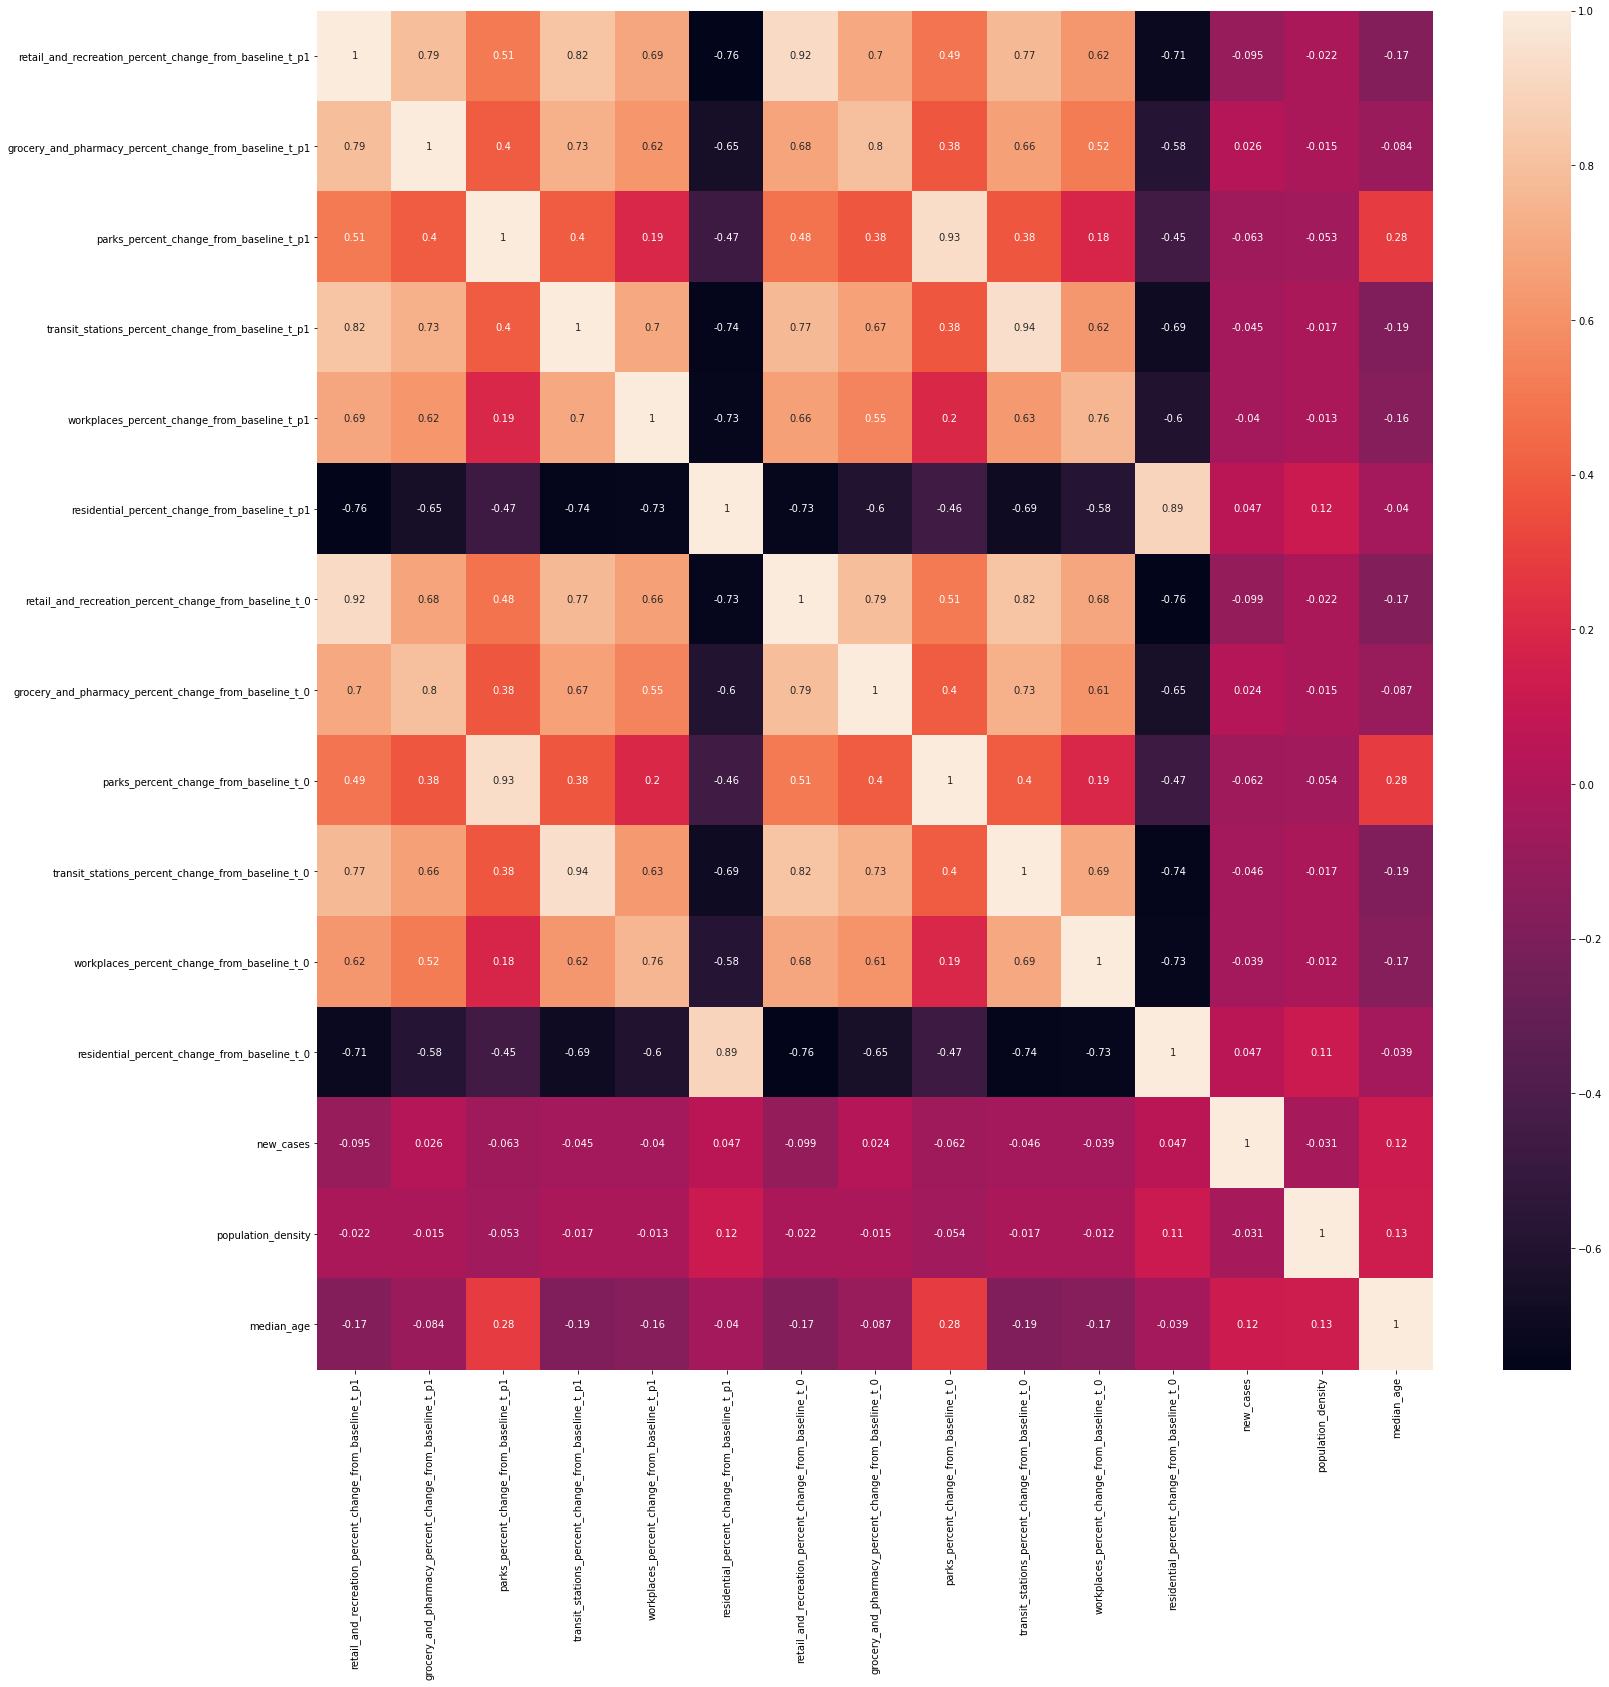

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
sns.heatmap(df_2.corr(),annot=True)

In [135]:
scaler = MinMaxScaler().fit(df_2)
df_2_scaled = scaler.transform(df_2)

In [136]:
plt.figure(figsize=(25,25))
sns.heatmap(df_2_scaled.corr(),annot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1800x1800 with 0 Axes>

In [72]:
#Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
#split dataset in features and target variable

X = df_2.drop('new_cases',axis=1) # Features
y = df_2['new_cases'] # Target variable

In [73]:
X.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1',
       'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'population_density',
       'median_age'],
      dtype='object')

In [74]:
y = y.astype(int)

In [75]:
#Look at the distribution of new_cases

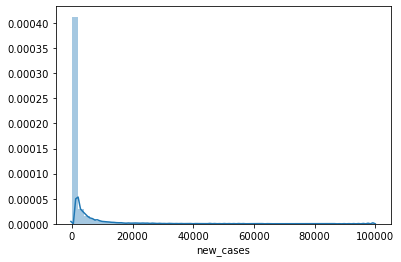

In [76]:
sns.distplot(y)

In [77]:
y.unique()

array([   1,    0,    4, ..., 3751, 2320, 2327])

In [78]:
y.nunique()

8348

In [79]:
#Maximum value of daily reported new cases
y.max()

99638

In [80]:
print ("Number of entries with more than 10 new cases reported per day :",len(df_2[df_2['new_cases']>10]))
print ("Number of entries with more than 100 new cases reported per day :",len(df_2[df_2['new_cases']>100]))
print ("Number of entries with more than 1000 new cases reported per day :",len(df_2[df_2['new_cases']>1000]))
print ("Number of entries with more than 10000 new cases reported per day :",len(df_2[df_2['new_cases']>10000]))
print ("Number of entries with more than 100000 new cases reported per day :",len(df_2[df_2['new_cases']>100000]))
print ("Number of entries with more than 200000 new cases reported per day :",len(df_2[df_2['new_cases']>200000]))

Number of entries with more than 10 new cases reported per day : 37325
Number of entries with more than 100 new cases reported per day : 28493
Number of entries with more than 1000 new cases reported per day : 13264
Number of entries with more than 10000 new cases reported per day : 2578
Number of entries with more than 100000 new cases reported per day : 0
Number of entries with more than 200000 new cases reported per day : 0


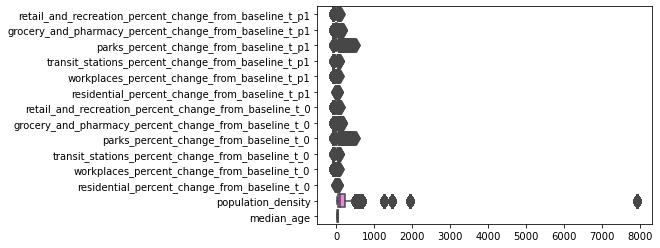

In [81]:
#Outlier analysis of input features
sns.boxplot(data=X,orient="h",fliersize=10)

In [82]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [83]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

In [84]:
#from sklearn.preprocessing import MaxAbsScaler
#scaler = MaxAbsScaler()

In [85]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()

In [86]:
#from sklearn.preprocessing import QuantileTransformer
#scaler = QuantileTransformer()

In [87]:
#from sklearn.preprocessing import Normalizer
#scaler = Normalizer(norm = 'l2')

In [88]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [89]:
#Try different models

In [90]:
# Baseline evaluation

num_folds = 3
seed =7

scoring = 'mean_squared_error'

In [91]:
#Evaluate each model in a loop

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

results = []

names = []

models = []

models.append(('LR' , LinearRegression()))
models.append(('KNN' , KNeighborsRegressor()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('RandomForest', RandomForestRegressor()))

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []

for name, model in models:
  kfold = KFold(n_splits = num_folds , random_state = seed)
  cv_results = cross_val_score(model, X_train, y_train , cv = kfold)
  results.append(cv_results)
  names.append(name)
  msg = "%s : Mean: %f (Std: %f)" % ( name , cv_results.mean() , cv_results.std())
  print(msg)

LR : Mean: 0.057233 (Std: 0.004496)
KNN : Mean: 0.698784 (Std: 0.009671)
DecisionTree : Mean: 0.670593 (Std: 0.021122)
AdaBoost : Mean: 0.092775 (Std: 0.152785)
RandomForest : Mean: 0.826894 (Std: 0.010308)


[Text(0, 0, 'LR'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DecisionTree'),
 Text(0, 0, 'AdaBoost'),
 Text(0, 0, 'RandomForest')]

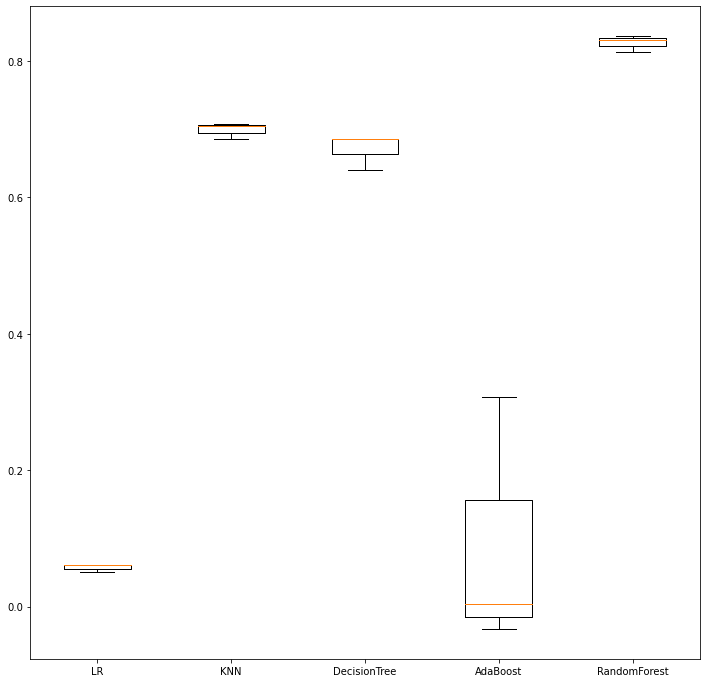

In [93]:
from matplotlib import pyplot

fig = pyplot.figure(figsize = (12,12))
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

In [94]:
#Baseline Evaluation - With Standardization

pipelines = []
scaler_used = MinMaxScaler()

pipelines.append(('ScaledLR' , Pipeline([('Scaler' , scaler_used) , ('LR' , LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', scaler_used), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDecisionTree', Pipeline([('Scaler', scaler_used), ('DecisionTree', DecisionTreeRegressor())])))
pipelines.append(('ScaledAdaBoost', Pipeline([('Scaler', scaler_used),('AdaBoost', AdaBoostRegressor())])))
pipelines.append(('ScaledRandomForest', Pipeline([('Scaler', scaler_used),('RandomForest', RandomForestRegressor())])))

In [95]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.057233 (0.004496)
ScaledKNN: 0.708357 (0.025749)
ScaledDecisionTree: 0.656253 (0.010714)
ScaledAdaBoost: 0.126046 (0.125593)
ScaledRandomForest: 0.827781 (0.011764)


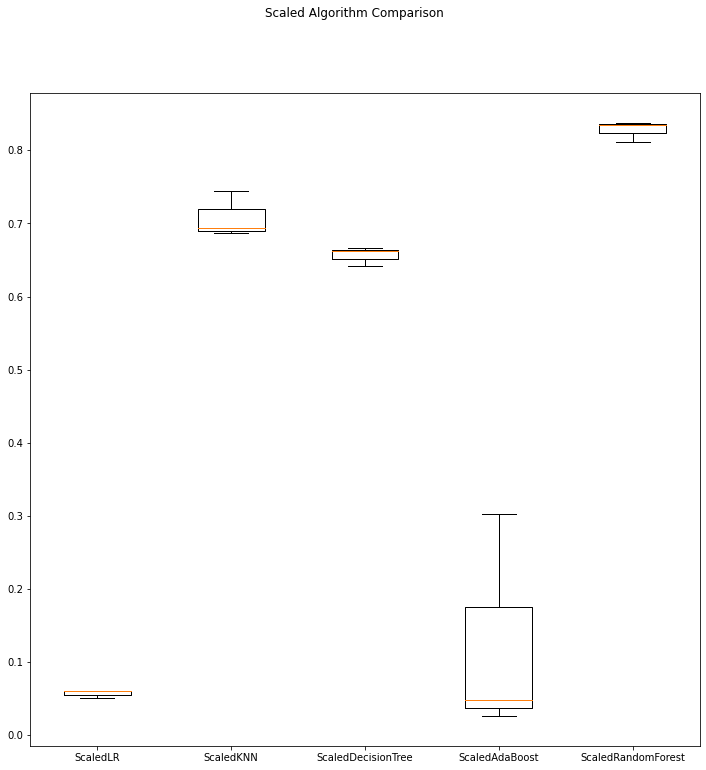

In [96]:
fig = pyplot.figure(figsize=(12,12))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [97]:
X_train.head(10)
X_train.columns

Index(['retail_and_recreation_percent_change_from_baseline_t_p1',
       'grocery_and_pharmacy_percent_change_from_baseline_t_p1',
       'parks_percent_change_from_baseline_t_p1',
       'transit_stations_percent_change_from_baseline_t_p1',
       'workplaces_percent_change_from_baseline_t_p1',
       'residential_percent_change_from_baseline_t_p1',
       'retail_and_recreation_percent_change_from_baseline_t_0',
       'grocery_and_pharmacy_percent_change_from_baseline_t_0',
       'parks_percent_change_from_baseline_t_0',
       'transit_stations_percent_change_from_baseline_t_0',
       'workplaces_percent_change_from_baseline_t_0',
       'residential_percent_change_from_baseline_t_0', 'population_density',
       'median_age'],
      dtype='object')

In [98]:
#Fine tune KNN model

In [99]:
param_grid = {
    'n_neighbors' : [3,5,7,9],
    'weights' : ['distance','uniform'],
    'metric' : ['euclidean','manhattan']
}

In [100]:
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1, cv=kfold,n_jobs=-1)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

grid_result = grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.6min finished


In [101]:
means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with : %r " % (mean , stdev, param))

0.742703 (0.020410) with : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} 
0.728457 (0.022221) with : {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'} 
0.733433 (0.022607) with : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'} 
0.709296 (0.024473) with : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'} 
0.722801 (0.020493) with : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'} 
0.693863 (0.021100) with : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'} 
0.707294 (0.021940) with : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'} 
0.672803 (0.023535) with : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'} 
0.771526 (0.007340) with : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'} 
0.758515 (0.009932) with : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'} 
0.766442 (0.013585) with : {'metric': 'manhattan', 'n_neighbors': 5, 'weigh

In [102]:
print("Best %f using %s" % (grid_result.best_score_ , grid_result.best_params_))

Best 0.771526 using {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [103]:
# prepare the model
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = KNeighborsRegressor(metric = 'manhattan',n_neighbors = 3, weights = 'distance')
model.fit(rescaledX, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights='distance')

In [104]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)

knn_pred_test = model.predict(rescaledValidationX)

In [105]:
from sklearn.metrics import r2_score
print(r2_score(y_test,knn_pred_test))

0.83196059989392


In [106]:
print(mean_squared_error(y_test,knn_pred_test))

9262571.15371577


In [107]:
y_test[:10]

25587     5681
54019        9
46740     3273
45001        0
38402      365
39159      213
4535         0
41234       55
51810    18856
15248      162
Name: new_cases, dtype: int32

In [108]:
knn_pred_test[:10]

array([6.96750184e+03, 1.34755917e+01, 1.59349813e+03, 0.00000000e+00,
       2.07823399e+02, 4.62513824e+02, 0.00000000e+00, 4.59425881e+01,
       1.63694437e+04, 1.37536277e+02])

In [109]:
##Fine tune RandomForestRegressor

In [110]:
# Parameters for RF
import numpy
param_grid = dict(n_estimators=numpy.array([10,50,100]))

In [111]:
# Tune scaled Random Forest
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, verbose=1, n_jobs=-1)
grid_result = grid.fit(rescaledX, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.3min finished


In [112]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.827240 using {'n_estimators': 100}


In [113]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

0.803586 (0.004614) with: {'n_estimators': 10}
0.824201 (0.012473) with: {'n_estimators': 50}
0.827240 (0.011153) with: {'n_estimators': 100}


In [114]:
# prepare the model
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = RandomForestRegressor(random_state=seed, n_estimators=10)
model.fit(rescaledX, y_train)

RandomForestRegressor(n_estimators=10, random_state=7)

In [115]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
rf_pred_test = model.predict(rescaledValidationX)

In [116]:
from sklearn.metrics import r2_score, accuracy_score

print(r2_score(y_test,rf_pred_test))

0.8532276400610432


In [118]:
print(mean_squared_error(y_test,rf_pred_test))

8090301.598762853


In [119]:
y_test[:10]

25587     5681
54019        9
46740     3273
45001        0
38402      365
39159      213
4535         0
41234       55
51810    18856
15248      162
Name: new_cases, dtype: int32

In [120]:
rf_pred_test[:10]

array([7.71400e+03, 1.34000e+01, 1.76770e+03, 2.62300e+02, 1.38300e+02,
       6.39000e+02, 2.00000e+00, 5.11000e+01, 1.66513e+04, 2.77100e+02])

In [121]:
#Analysis on test error ratio

In [122]:
test_error_ratio = pd.DataFrame(y_test/rf_pred_test)

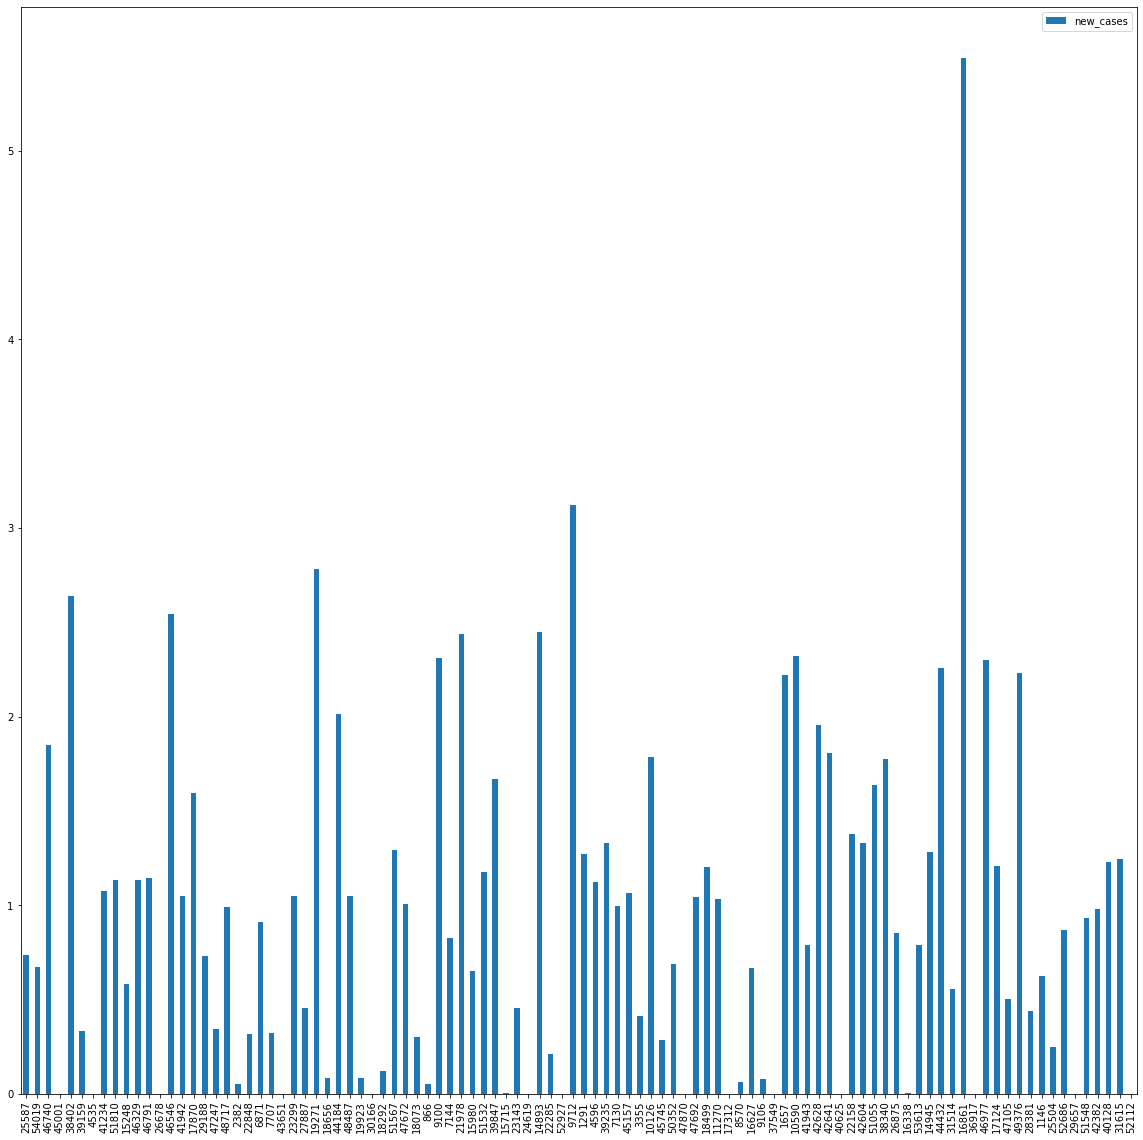

In [123]:
test_error_ratio[:100].plot(kind='bar',figsize=(20,20))

In [124]:
test_error_ratio.columns = ['ERROR']

In [125]:
print("Size of test samples :",len(test_error_ratio))

Size of test samples : 14784


In [126]:
test_error_ratio.loc[(test_error_ratio['ERROR'] > 0.5) & (test_error_ratio['ERROR'] < 2)]

,ERROR
25587,0.736453
54019,0.671642
46740,1.851559
41234,1.076321
51810,1.132404
...,...
33965,1.051502
53546,1.197209
49265,1.325468
20248,0.921280


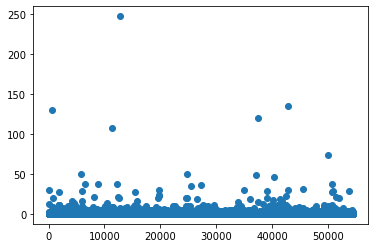

In [128]:
g=plt.plot(y_test/rf_pred_test,marker='o',linestyle='')

In [129]:
#Analysis on test error difference

In [130]:
test_error_diff = pd.DataFrame(y_test - rf_pred_test)

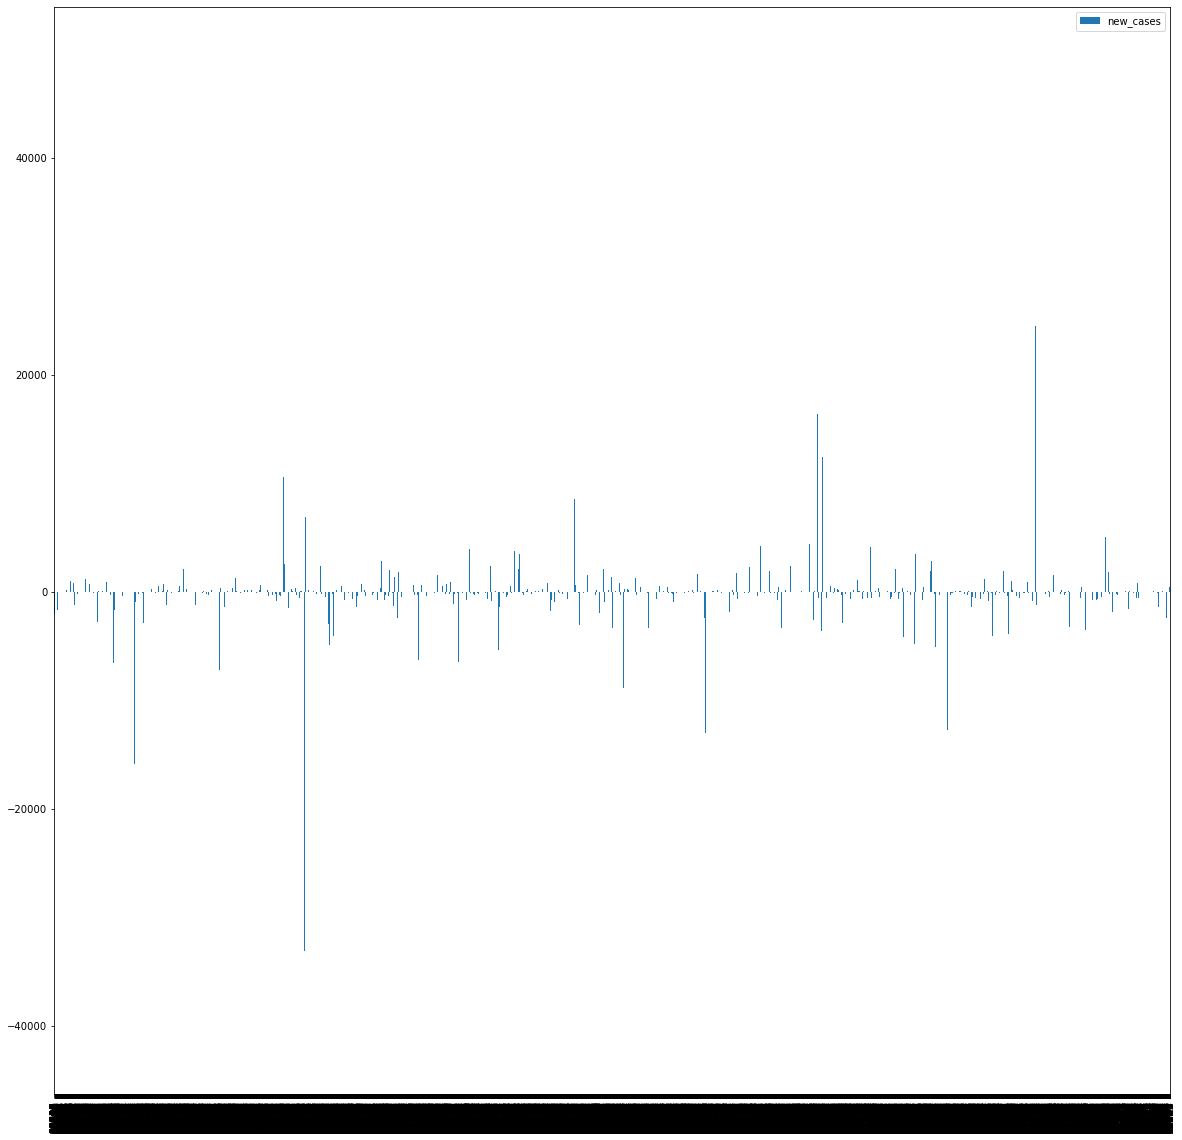

In [131]:
test_error_diff.plot(kind='bar',figsize=(20,20))

In [132]:
test_error_diff.columns = ['ERROR']

In [133]:
print("Size of test samples :",len(test_error_diff))

Size of test samples : 14784


In [134]:
test_error_diff.loc[(test_error_diff['ERROR'] > -1000) & (test_error_diff['ERROR'] < 1000)]

,ERROR
54019,-4.4
45001,-262.3
38402,226.7
39159,-426.0
4535,-2.0
...,...
3571,16.1
49265,46.9
20248,-18.2
12381,29.6
